In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import stat
import statsmodels.api as sm
import statsmodels.formula.api as sms
import seaborn as sns
import numpy as np
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
boston = sm.datasets.get_rdataset('Boston', 'MASS').data

C:\Users\Richy\Anaconda3\lib\site-packages\statsmodels\datasets\utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


In [3]:
type(boston)

pandas.core.frame.DataFrame

In [4]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
lm = sms.ols('medv ~ lstat', data=boston)
res=lm.fit()

In [6]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           5.08e-88
Time:                        16:11:35   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [7]:
print(f'Equal to coef() in r:\n\n{res.params}')

Equal to coef() in r:

Intercept    34.553841
lstat        -0.950049
dtype: float64


In [8]:
print(f'2.5% & 97.5% coeffiecnt estimates:\n\n{res.conf_int()}')

2.5% & 97.5% coeffiecnt estimates:

                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951


In [9]:
# statsmodels includes functions for getting the prediction and confidence intervals.

# Get prediction interval for a given x
prstd, iv_l, iv_u = wls_prediction_std(res)

# statsmodels also includes the confidence intervals for the fitted values (i.e. the mean fits)
# but they are buried in the results of summary table function.
from statsmodels.stats.outliers_influence import summary_table

# call the summary table at a (1-alpha)100% confidence interval level
simpleTable, data, column_names = summary_table(res, alpha=0.05)

# Data contains the confidence intervals we want but we need to make sure we get the right
# columns so lets print off the names
print('column_names: ', column_names)

# Get confidence intervals for a given x
predicted_mean_ci_low, predicted_mean_ci_high = data[:,4:6].T

column_names:  ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


C:\Users\Richy\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


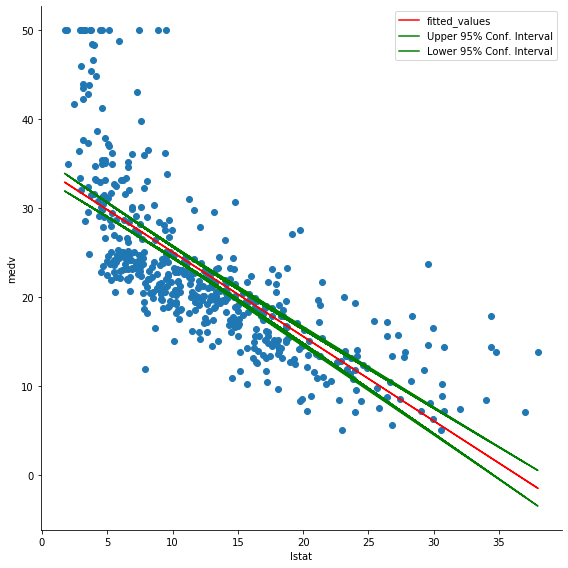

In [10]:
g=sns.FacetGrid(boston, size=8)
g=g.map(plt.scatter, 'lstat', 'medv')
plt.plot(boston['lstat'], res.fittedvalues, color='r', label='fitted_values')
plt.plot(boston['lstat'], predicted_mean_ci_high, color='g', label='Upper 95% Conf. Interval')
plt.plot(boston['lstat'], predicted_mean_ci_low, color='g', label='Lower 95% Conf. Interval')
plt.legend();

### Multiple Linear Regression

In [11]:
mult_lin=sms.ols('medv ~ lstat+age', data=boston)
mult_res=mult_lin.fit()

In [12]:
print(mult_res.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           2.98e-88
Time:                        16:11:58   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [13]:
cols = ' + '.join([f'{i}' for i in boston.drop('medv', axis=1).columns])

In [14]:
cols

'crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat'

In [15]:
mult_lin=sms.ols(f'medv ~ {cols}', data=boston)
mult_res=mult_lin.fit()

In [16]:
print(mult_res.summary())
# indus and age have large p values

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 16 Apr 2020   Prob (F-statistic):          6.72e-135
Time:                        16:12:03   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

#### Calculate VIFs

In [17]:
# Compute all the variance inflation factors
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=sm.add_constant(boston.drop('medv', axis=1))

VIFs = [(predictor, variance_inflation_factor(X.values,_)) \
        for _,predictor in enumerate(list(X))] # list(X) returns column names of df

print('Variance Inflation Factors:')
for tup in VIFs:
    print('{:10}'.format(tup[0]), '{:.2f}'.format(tup[1]))

Variance Inflation Factors:
const      585.27
crim       1.79
zn         2.30
indus      3.99
chas       1.07
nox        4.39
rm         1.93
age        3.10
dis        3.96
rad        7.48
tax        9.01
ptratio    1.80
black      1.35
lstat      2.94


C:\Users\Richy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [18]:
cols.replace('age + ', '')

'crim + zn + indus + chas + nox + rm + dis + rad + tax + ptratio + black + lstat'

In [19]:
form=f"medv ~ {cols.replace('age + ', '')}"
mult_lin2=sms.ols(form, data=boston)
mult_res2=mult_lin2.fit()

In [20]:
print(mult_res2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Thu, 16 Apr 2020   Prob (F-statistic):          6.08e-136
Time:                        16:12:07   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.0

#### Interaction Terms

In [21]:
print(sms.ols('medv~lstat*age', data=boston).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           4.86e-88
Time:                        16:12:08   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

#### Non-linear Transformation 

In [22]:
quad=sms.ols('medv~lstat+I(lstat**2)', data=boston).fit()

In [23]:
print(quad.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 16 Apr 2020   Prob (F-statistic):          1.56e-112
Time:                        16:12:10   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

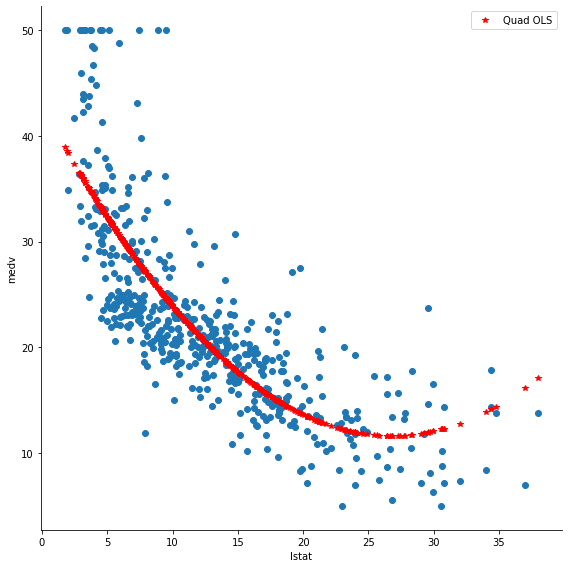

In [24]:
g=sns.FacetGrid(boston, size=8)
g=g.map(plt.scatter, 'lstat', 'medv')
plt.plot(boston['lstat'], quad.fittedvalues, marker='*', linestyle='none', color='r', label='Quad OLS')
plt.legend();

In [79]:
from statsmodels.stats.anova import anova_lm

In [80]:
anova_lm(res, quad)

C:\Users\Richy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Richy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Richy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28
